In [56]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

作业13

假设一颗大质量的恒星为40,000K的O型星，其热光度为太阳的10万倍，假设周围是中性星际气体(全部为氢原子，n~10cm-3)均匀分布,其在10000年内能电离的球形空间的半径为多大?


In [15]:
L = 1e5 * 3.828 * 1e33 #erg/s 
t = 10000 * 365 * 24 * 3600 #s
n = 10 #cm-3
sigma = 6.3*1e-18 #cm2
#电离的H，即光子打在H的截面上使其电离的范围，假如不考虑复合再发射的话

#eff = (L / (4*np.pi*r**2)) * sigma #eff：电离率， L：恒星光度 r: 距离恒星的距离 sigma： 电离截面
#V = (4/3)*np.pi*r**3 #体积

#N = n * V = n * (4/3)*np.pi*r**3 #H总数 
#N = eff * t = (L / (4*np.pi*r**2)) * sigma  * t 
#联立上面两个方程
r = ((3/16)*(1/np.pi/np.pi)*(L*sigma*t/n))**(1/5) /1e5 # km
print('电离的半径为: {:.2f} km'.format(r))

电离的半径为: 10.76 km


##重点是计算10000年内能产生多少E>13.6ev的光子

请对银河系中的各种物质成分的质量比进行估算

暗物质质量: ~1e12 Msun
恒星质量: ~1e11 Msun
星系介质质量: ~1e11Msun
黑洞质量: ~1e6 Msun

作业15

下载一个LAMOST或者SDSS观测到的星系光谱文件，画出相应光谱，测量至少一个Lick指数特征及其误差，并在图中标注

Text(0, 0.5, 'Flux')

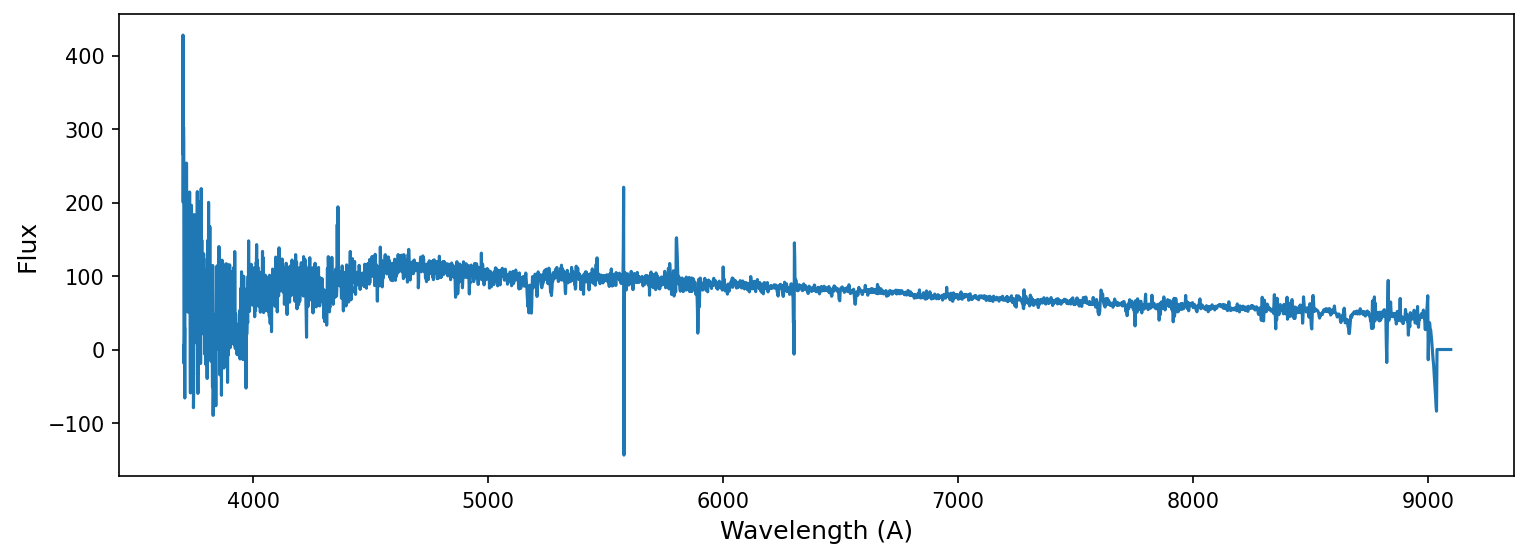

In [42]:
path = './spec-55859-F5902_sp01-001'
hdu_list = fits.open(path+'.fits', cache=True)
flux = hdu_list[1].data['FLUX'].reshape(3908,)
wavelength = hdu_list[1].data['WAVELENGTH'].reshape(3908,)
plt.figure(dpi=150,figsize=(12,4))
plt.plot(wavelength,flux)
plt.xlabel('Wavelength (A)',size=12)
plt.ylabel('Flux',size=12)

Text(0.5, 1.0, 'Mg2')

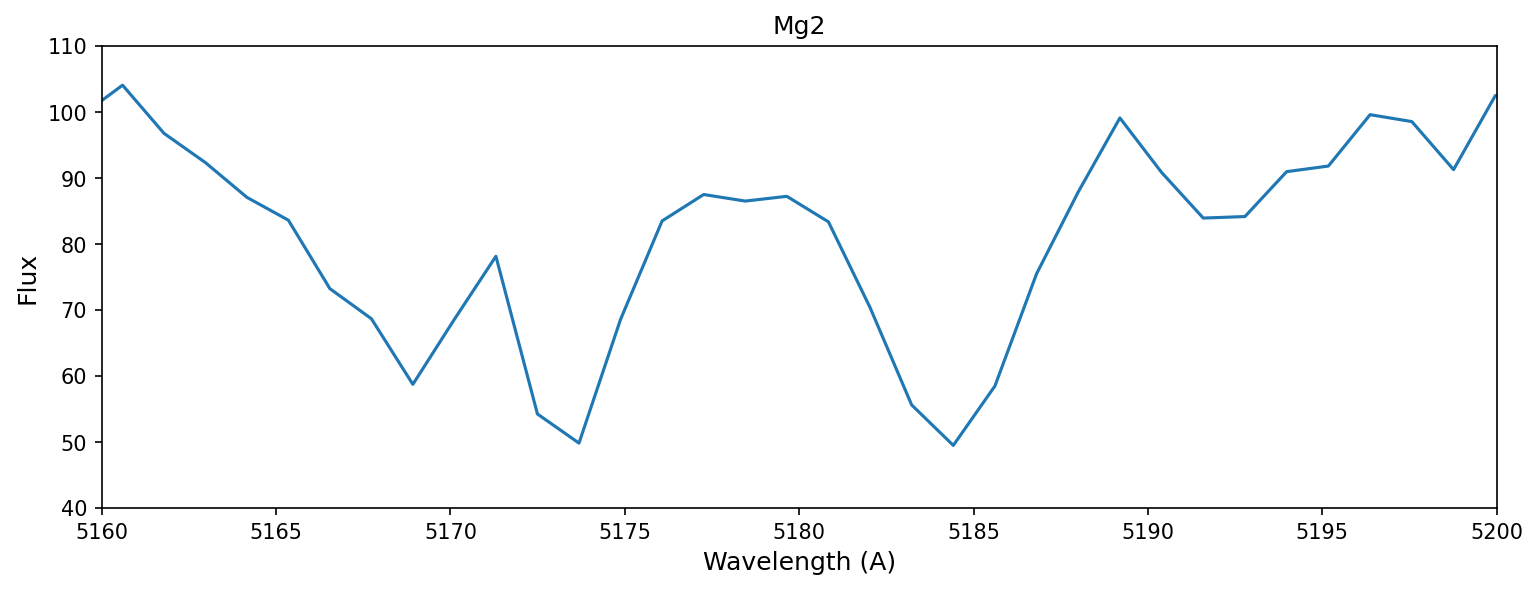

In [52]:
plt.figure(dpi=150,figsize=(12,4))
plt.plot(wavelength,flux)
plt.xlabel('Wavelength (A)',size=12)
plt.ylabel('Flux',size=12)
plt.xlim([5160,5200])
plt.ylim([40,110])
plt.title('Mg2',size=12)

In [61]:
#Mag = -2.5*log10[(1/(λ2-λ1))*∫_{λ2,λ1}(FIλ/Fcλ)dλ] #Worthey et al. 1994
w = np.array([4895.125,4957.625,5154.125,5196.625,5301.125,5366.125])
dw = 2.
idxb = np.where(((wavelength > w[0] - dw) & (wavelength < w[1] + dw)))
idxr = np.where(((wavelength > w[4] - dw) & (wavelength < w[5] + dw)))
idxcen = np.where(((wavelength > w[2] - dw) & (wavelength < w[3] + dw)))

wb = wavelength[idxb]
wr = wavelength[idxr]
wcen = wavelength[idxcen]

fb = flux[idxb]
fr = flux[idxr]
fcen = flux[idxcen]  

sb = InterpolatedUnivariateSpline(wb, fb)
sr = InterpolatedUnivariateSpline(wr, fr)

fp1 = sb.integral(w[0], w[1]) / (w[1] - w[0])
fp2 = sr.integral(w[4], w[5]) / (w[5] - w[4])

x1 = (w[0] + w[1])/2.
x2 = (w[4] + w[5])/2.
fc = fp1 + (fp2 - fp1)/ (x2 - x1) * (wcen - x1)
            
ffc = InterpolatedUnivariateSpline(wcen, fcen/fc/(w[3]-w[2]))

R =  ffc.integral(w[2], w[3])
Ia = (1 - R) * (w[3]-w[2])
Im = -2.5 * np.log10(R)

print('Mg2的lick indice为: {:.4f}'.format(Im))

Mg2的lick indice为: 0.2463


SDSS的光谱分辨率是~2000，某星系其连续谱单位波长的典型信噪比为5，该星系Ha线的等值宽度为50A，请问其Ha线流量的信噪比是多少？

In [38]:
lamada_Ha = 6563
delta_lamada = lamada_Ha/2000
EW = 50
SN_Ha = EW/delta_lamada
print('Ha的信噪比为: {:.2f}'.format(SN_Ha))

Ha的信噪比为: 15.24
